In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import random
import pandas as pd

In [2]:
dataset = pd.read_csv('soc-sign-bitcoinalpha.csv', header=None)
dataset.columns = ['source', 'target', 'rating', 'timestamp']
edge_list = [(int(row['source']), int(row['target']), int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
delta = 30
k = 4

In [4]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [5]:
def random_percentage_subset(input_list, percentage, seed=None):
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100.")

    # Set the seed for reproducibility
    random.seed(seed)

    # Calculate the number of elements to include
    num_elements = int(len(input_list) * (percentage / 100))

    # Randomly select elements
    subset = random.sample(input_list, num_elements)

    return subset

## PaCo

In [6]:
def execute_paco(data, delta, k):     
    start = time()
    C = paco(data, delta, k)
    end = time()
    count = sum(C.values())
    return count, end-start

In [7]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    data = TimeStampedLinkList.from_edgelist(n_edges)
    count, runtime = execute_paco(data, delta, k)
    results.append((count, runtime, round(n_links / 10**3)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.19it/s]


In [8]:
_, paco_runtimes_sec, paco_n_links = zip(*results)

## Baseline

In [9]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    
    # Create pathpy temporal network
    t = create_temporal_network(n_edges)
    
    # Calculate paths
    count, runtime = get_total_causal_paths(t, delta, k)
    
    
    results.append((count, runtime, round(n_links / 10**3)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4837/4837 [00:00<00:00, 123472.25it/s]

2023-12-18 00:04:33 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:04:34 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		142397
Roots:		4487
Leaves:		137910
Links:		145110
Acyclic:	None

2023-12-18 00:04:34 [Severity.INFO]	Generating causal trees for 4487 root nodes ...
2023-12-18 00:04:34 [Severity.INFO]	finished.


 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:01<00:05,  1.45s/it]

Number of causal paths: Total path count: 		4837.0 
[Unique / Sub paths / Total]: 	[4837.0 / 9674.0 / 14511.0]
Nodes:				2261 
Edges:				4837
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 9674.0 / 9674.0 ]
Paths of length k = 1		4837.0 [ 4837.0 / 0.0 / 4837.0 ]





100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9674/9674 [00:00<00:00, 99734.04it/s]

2023-12-18 00:04:34 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:04:37 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		273188
Roots:		8498
Leaves:		264690
Links:		290220
Acyclic:	None

2023-12-18 00:04:37 [Severity.INFO]	Generating causal trees for 8498 root nodes ...
2023-12-18 00:04:37 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:04<00:07,  2.34s/it]

Number of causal paths: Total path count: 		9674.0 
[Unique / Sub paths / Total]: 	[9674.0 / 19348.0 / 29022.0]
Nodes:				3014 
Edges:				9674
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 19348.0 / 19348.0 ]
Paths of length k = 1		9674.0 [ 9674.0 / 0.0 / 9674.0 ]





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14511/14511 [00:00<00:00, 105076.83it/s]

2023-12-18 00:04:37 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:04:41 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		396085
Roots:		12115
Leaves:		383970
Links:		435330
Acyclic:	None

2023-12-18 00:04:41 [Severity.INFO]	Generating causal trees for 12115 root nodes ...
2023-12-18 00:04:41 [Severity.INFO]	Analyzing tree 2423/12115 ...
2023-12-18 00:04:41 [Severity.INFO]	Analyzing tree 4846/12115 ...
2023-12-18 00:04:41 [Severity.INFO]	Analyzing tree 7269/12115 ...
2023-12-18 00:04:42 [Severity.INFO]	Analyzing tree 9692/12115 ...
2023-12-18 00:04:42 [Severity.INFO]	Analyzing tree 12115/12115 ...
2023-12-18 00:04:42 [Severity.INFO]	finished.


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3/5 [00:09<00:06,  3.38s/it]

Number of causal paths: Total path count: 		14511.0 
[Unique / Sub paths / Total]: 	[14511.0 / 29022.0 / 43533.0]
Nodes:				3429 
Edges:				14511
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 29022.0 / 29022.0 ]
Paths of length k = 1		14511.0 [ 14511.0 / 0.0 / 14511.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19348/19348 [00:00<00:00, 87327.08it/s]

2023-12-18 00:04:42 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:04:47 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		510680
Roots:		15470
Leaves:		495210
Links:		580440
Acyclic:	None

2023-12-18 00:04:47 [Severity.INFO]	Generating causal trees for 15470 root nodes ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 1547/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 3094/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 4641/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 6188/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 7735/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 9282/15470 ...
2023-12-18 00:04:47 [Severity.INFO]	Analyzing tree 10829/15470 ...
2023-12-18 00:04:48 [Severity.INFO]	Analyzing tree 12376/15470 ...
2023-12-18 00:04:48 [Severity.INFO]	Analyzing tree 13923/15470 ...
2023-12-18 00:04:48 [Severity.INFO]	Analyzing tree 15470/15470 ...
2023-12-18 00:04:48 [Severity.INFO]	finished.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [00:15<00:04,  4.48s/it]

Number of causal paths: Total path count: 		19348.0 
[Unique / Sub paths / Total]: 	[19348.0 / 38696.0 / 58044.0]
Nodes:				3653 
Edges:				19348
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 38696.0 / 38696.0 ]
Paths of length k = 1		19348.0 [ 19348.0 / 0.0 / 19348.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24186/24186 [00:00<00:00, 82966.54it/s]

2023-12-18 00:04:48 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-18 00:04:55 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		619334
Roots:		18584
Leaves:		600750
Links:		725580
Acyclic:	None

2023-12-18 00:04:55 [Severity.INFO]	Generating causal trees for 18584 root nodes ...
2023-12-18 00:04:56 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		24186.0 
[Unique / Sub paths / Total]: 	[24186.0 / 48372.0 / 72558.0]
Nodes:				3783 
Edges:				24186
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 48372.0 / 48372.0 ]
Paths of length k = 1		24186.0 [ 24186.0 / 0.0 / 24186.0 ]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.73s/it]


In [10]:
_, baseline_runtimes_sec, baseline_n_links = zip(*results)

## Plots

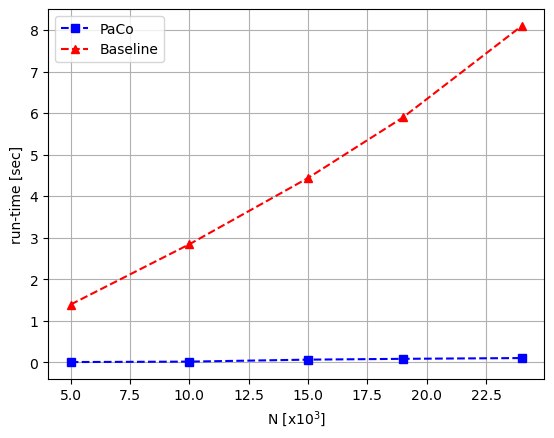

In [11]:
plt.plot(paco_n_links, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_n_links, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("N [x$10^3$]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/socbitcoinalpha_left_panel.png')
plt.show()